<a href="https://colab.research.google.com/github/HasanMuslim/ML.Project/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  CouncilArea    34854 non-null  object 
 14  Lattitude      26881 non-null  float64
 15  Longtitude     26881 non-null  float64
 16  Regionname     34854 non-null  object 
 17  Propertycount  34854 non-null  float64
dtypes: flo

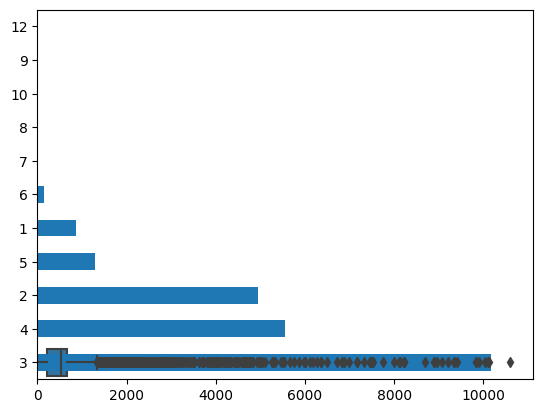

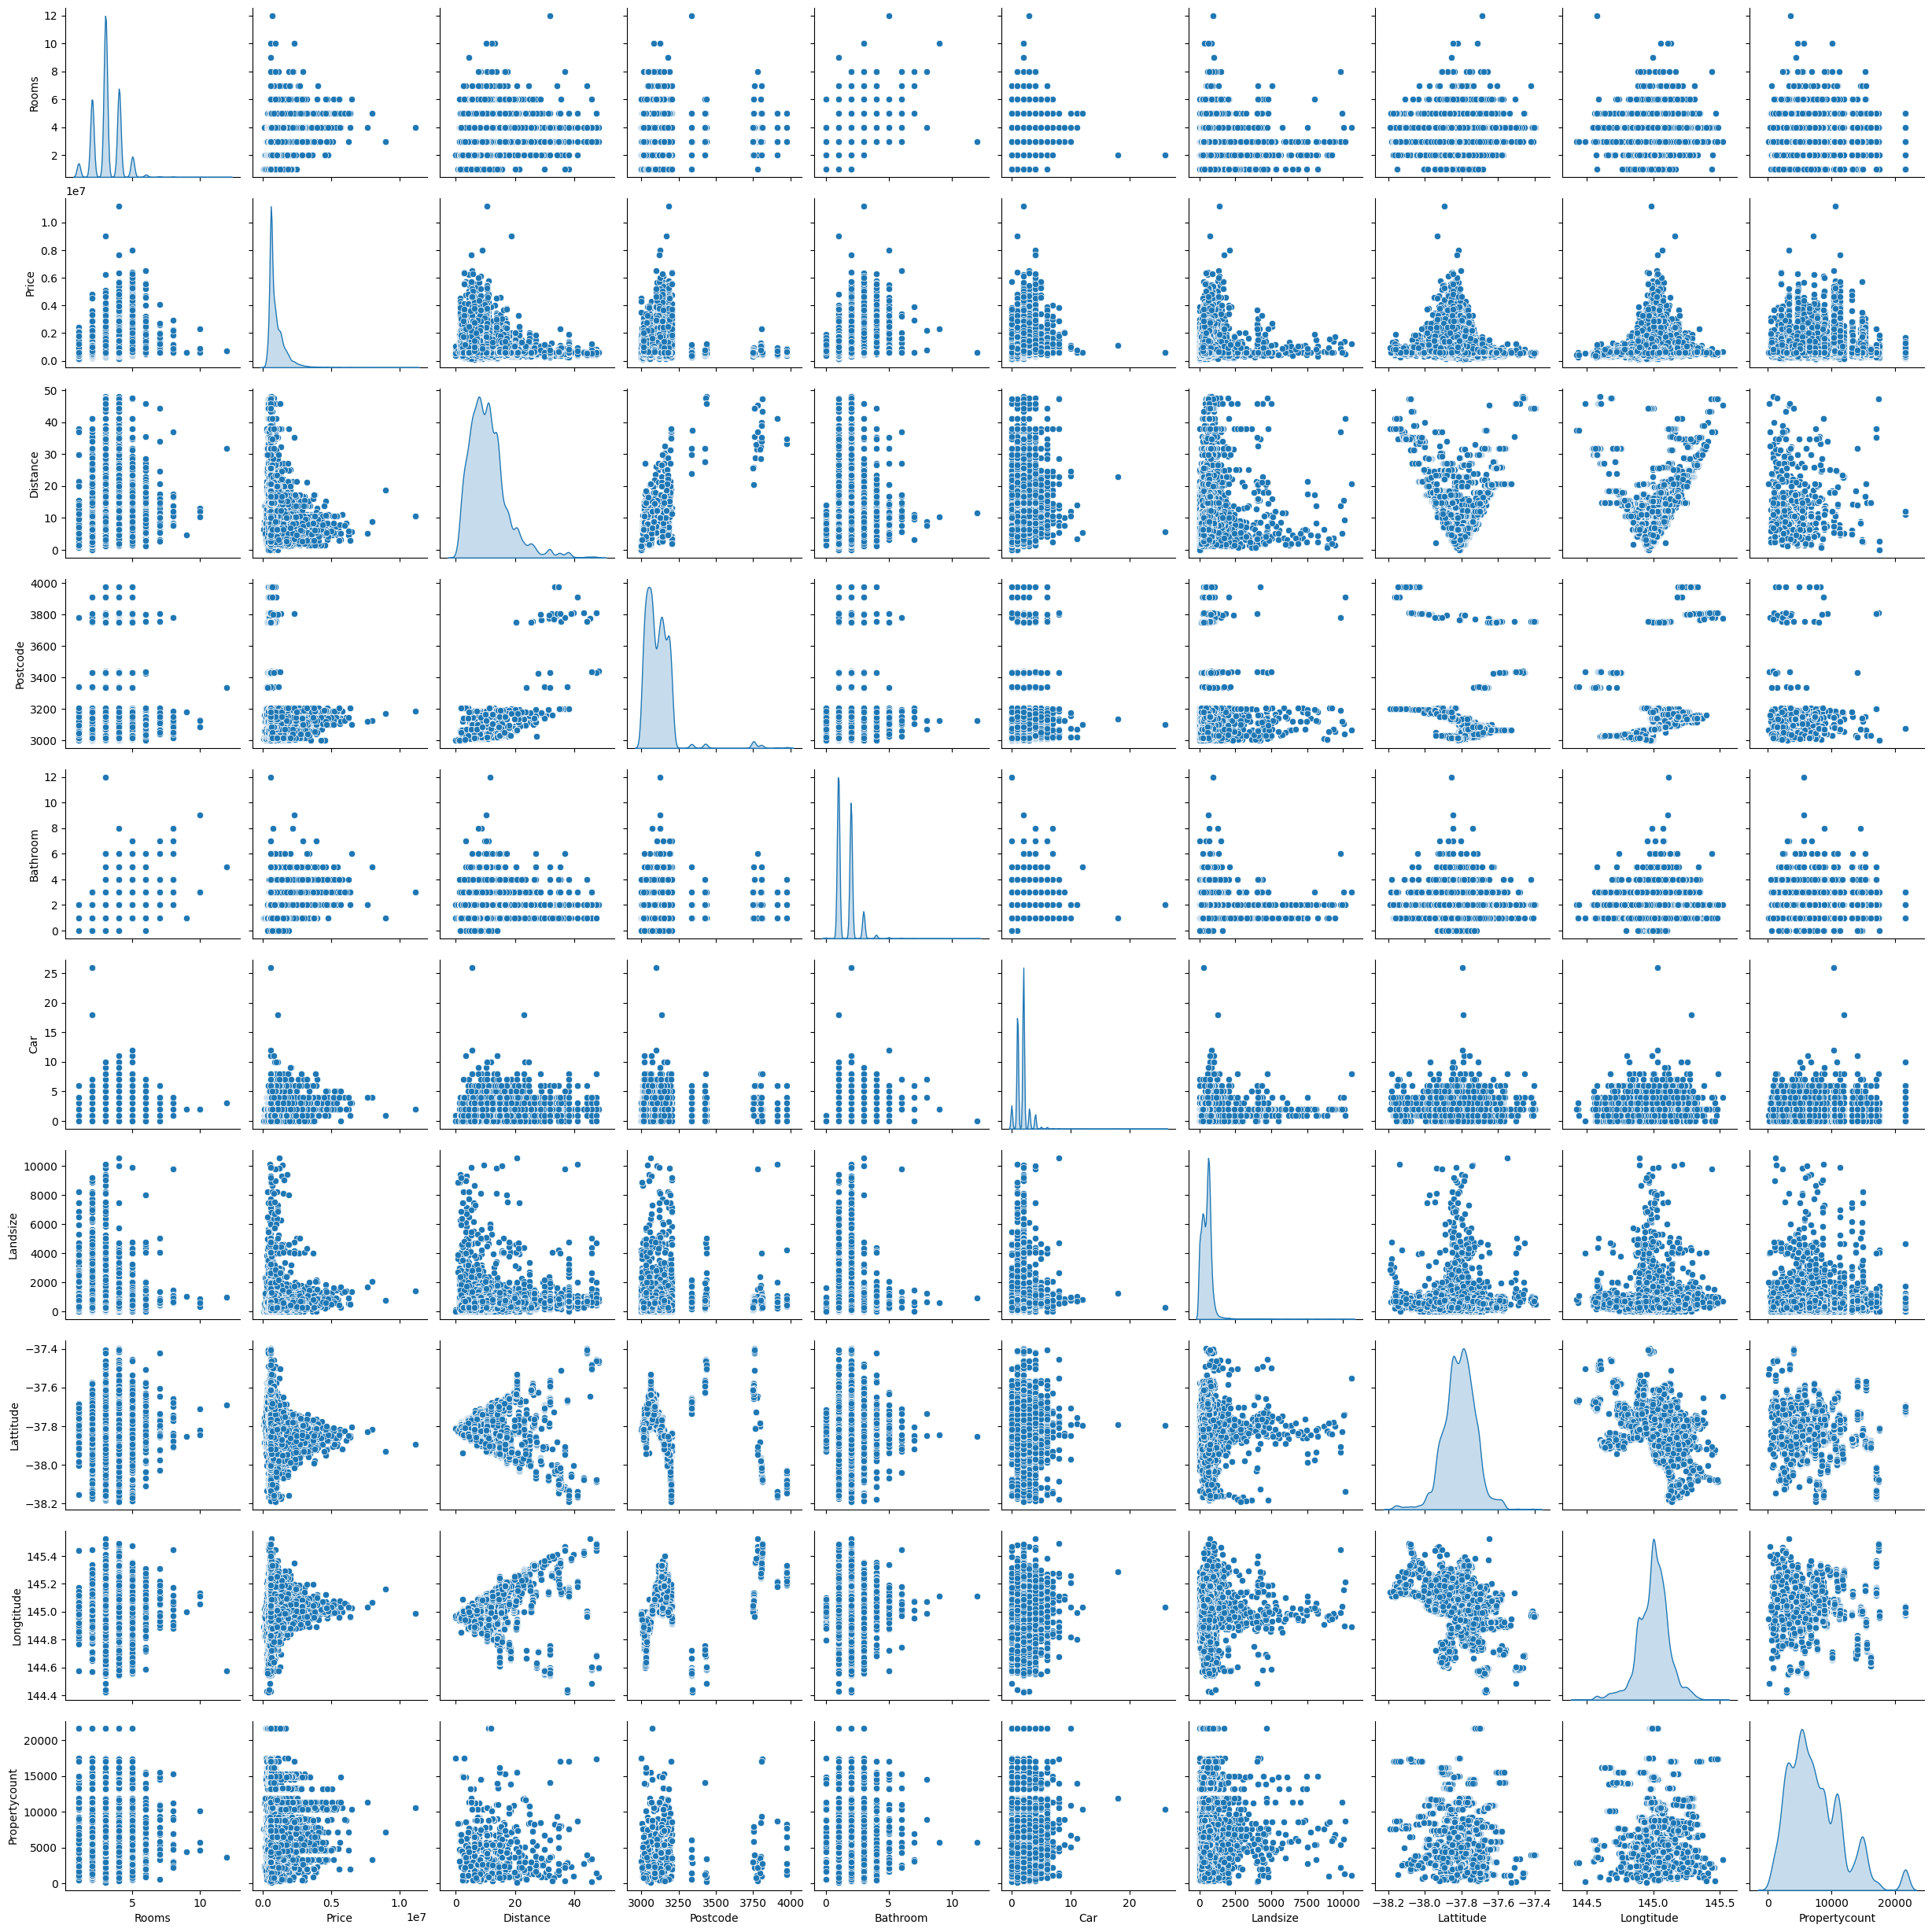

[5 0 6 2 4 1 3]
[[0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


ValueError: ignored

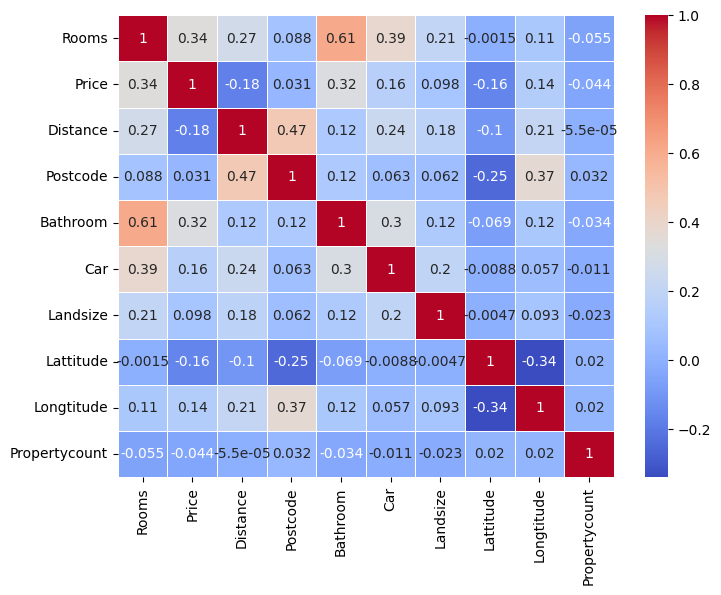

In [159]:
#Kütüphaneleri İçe Aktarma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn; "sklearn.model_selection"
import sklearn; "sklearn.metrics"
import sklearn; "sklearn.ensemble"

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

# Veri Setini Yükleme

dataset = pd.read_csv("/content/Melbourne_housing_FULL.csv.zip")

# Veri Droplama

dataset1 = dataset.drop(columns = "Bedroom2")
dataset2 = dataset1.drop(columns = "BuildingArea")
dataset3 = dataset2.drop(columns = "YearBuilt")

# Verilerin İstatistiksel İncelenmesi

dataset3.info()


print(f'Shape     : {dataset2.shape}\n'
      f'Size      : {dataset2.size}\n'
      f'Dimension : {dataset2.ndim}')


dataset2.nunique()

cat_cols = ["Suburb","Address","Type", "Method","SellerG", "CouncilArea", "Regionname"]
num_cols = ["Rooms","Price", "Date", "Distance", "Bathroom", "Car", "Postcode", "Landsize", "Lattitude", "Longtitude", "Propertycount"]

# Aykırı Değerleri Mod Yöntemi ile Doldurma


for column in dataset3.columns:
      dataset3["Bathroom"] = dataset3["Bathroom"].fillna(dataset3["Bathroom"].mode()[0])
      dataset3["Car"] = dataset3["Car"].fillna(dataset3["Car"].mode()[0])
      dataset3["Price"] = dataset3["Price"].fillna(dataset3["Price"].mode()[0])
      dataset3["Longtitude"] = dataset3["Longtitude"].fillna(dataset3["Longtitude"].mode()[0])

# Yinelenen Verileri Temizleme

duplicates = dataset3[dataset3.duplicated()]
print(duplicates)

cleaned_data = dataset3.drop_duplicates()
print(cleaned_data)

cleaned_data.isnull().sum()

# Z-Skor Yöntemi ile Aykırı Veri Temizleme

z_scores = (dataset3['Landsize'] - dataset3['Landsize'].mean()) / dataset3['Landsize'].std()

lower_z_limit = -3
upper_z_limit = 3

filtered_data = cleaned_data[(z_scores >= lower_z_limit) & (z_scores <= upper_z_limit)]

print(filtered_data)

filtered_data.isnull().sum()

sns.boxplot(x=filtered_data['Landsize'])

# Veri Görselleştirme

filtered_data.Rooms.value_counts().plot.barh()

sns.pairplot(filtered_data, diag_kind="kde")
plt.show()

# Korelasyon Matrisi Çizimi

korelasyon_matrisi = filtered_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', linewidths=0.5)

# Label Encoder ve OneHotEncoder Uygulama

cat_cols_array = np.array(cat_cols)

cat_cols_array2d = cat_cols_array.reshape(-1, 1)

label_encoder = LabelEncoder()
LabelEncoded_data = label_encoder.fit_transform(cat_cols_array2d)

print(LabelEncoded_data)

encoder = OneHotEncoder(sparse=False)
OneHotEncoded_data = encoder.fit_transform(cat_cols_array2d)

print(OneHotEncoded_data)

# Model Seçimi

x = filtered_data.drop(["Price"], axis = 1)
y = filtered_data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

x_train.shape
x_test.shape

y_train.shape
y_test.shape

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

y_tahmin = rf_model.predict(x_test)

MSE = mean_squared_error(y_test, y_tahmin)
R2 = r2_score(y_test, y_tahmin)

print(MSE)
print(R2)